1. Heatmap for Infractions by Location and Time

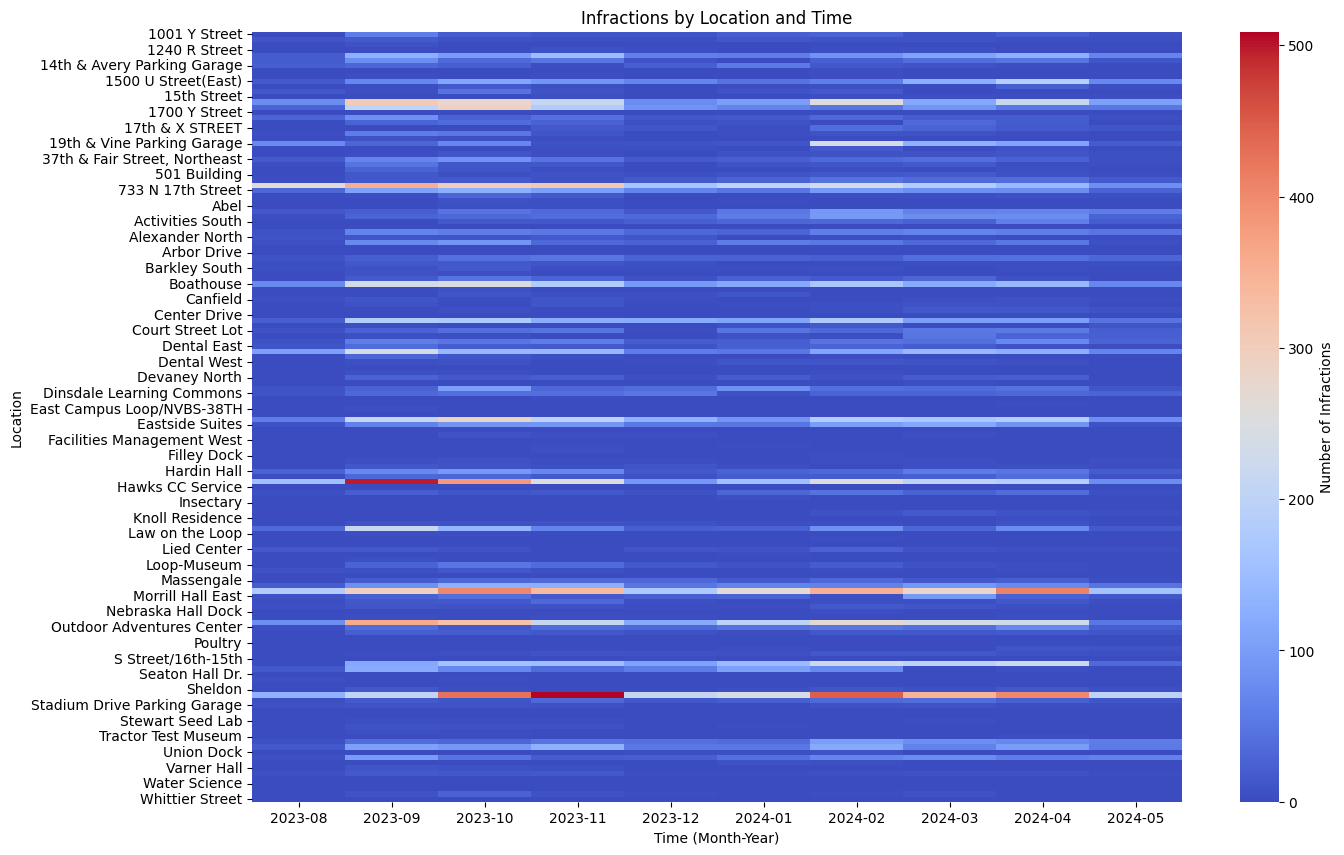

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = pd.read_csv('./Citations Issued Fall & Spring 24- Citations Issued.csv')

# Convert Issue Date to datetime and extract month and year
data['Issue Date'] = pd.to_datetime(data['Issue Date'])
data['Month-Year'] = data['Issue Date'].dt.to_period('M')

# Group by Location and Month-Year
heatmap_data = data.groupby(['LOCATION', 'Month-Year']).size().unstack(fill_value=0)

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, cmap='coolwarm', cbar_kws={'label': 'Number of Infractions'})
plt.title('Infractions by Location and Time')
plt.xlabel('Time (Month-Year)')
plt.ylabel('Location')
plt.show()

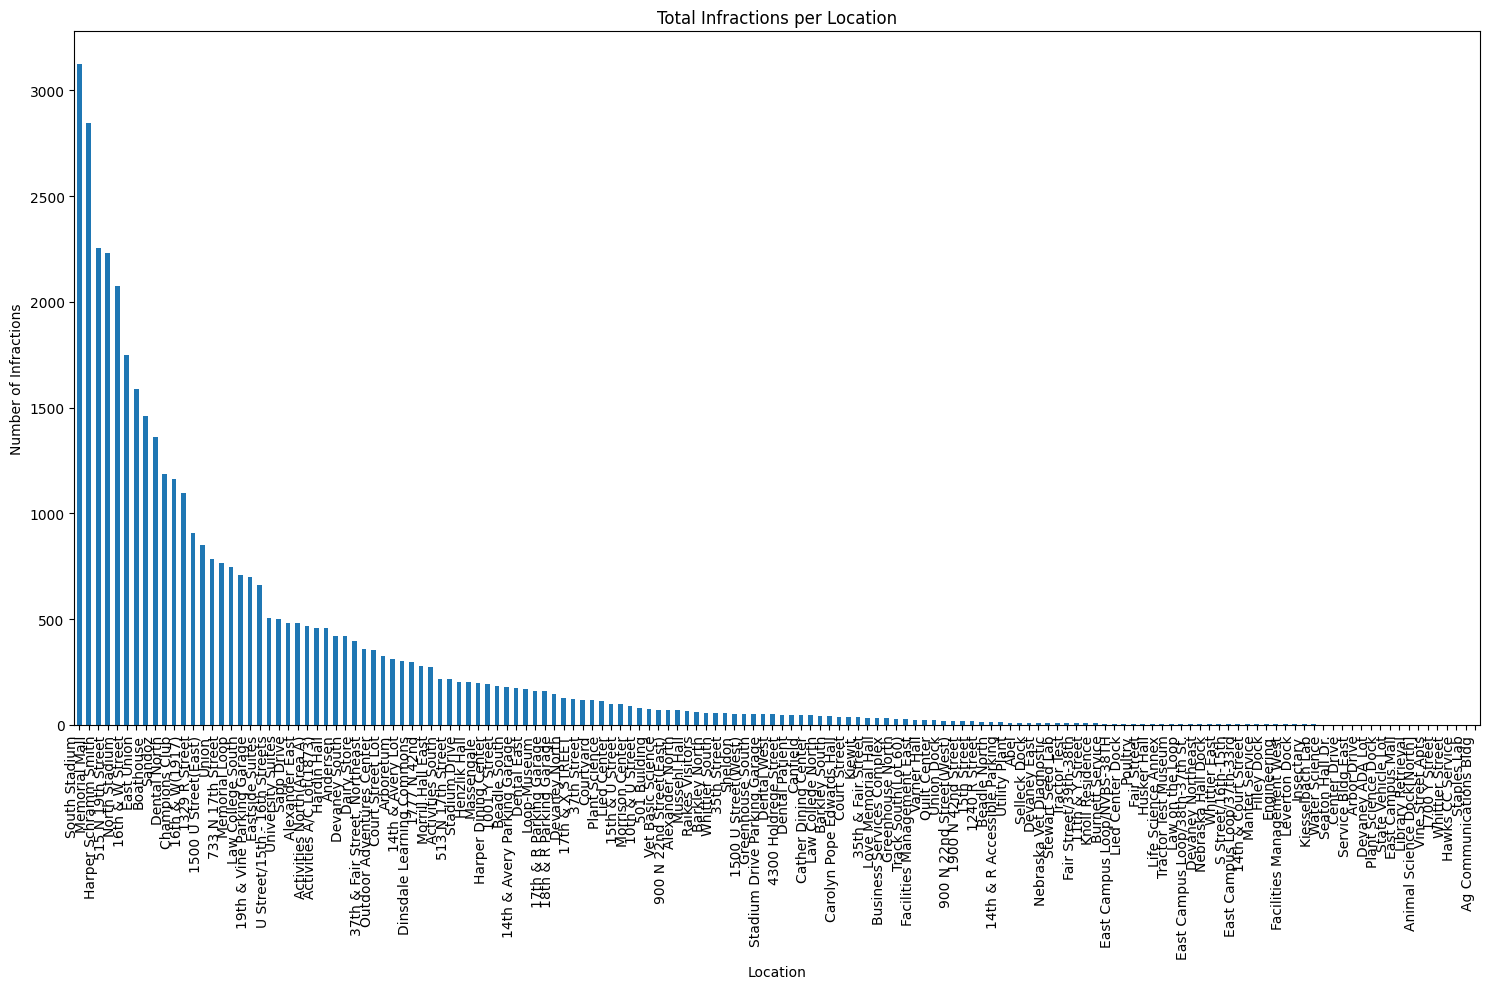

In [18]:
location_counts = data['LOCATION'].value_counts()

# Plot bar chart with adjusted figure size and label rotation
plt.figure(figsize=(15, 10))  # Increase figure size
location_counts.plot(kind='bar')
plt.title('Total Infractions per Location')
plt.xlabel('Location')
plt.ylabel('Number of Infractions')
plt.xticks(rotation=90, ha='right')  # Rotate labels and align to the right for better readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

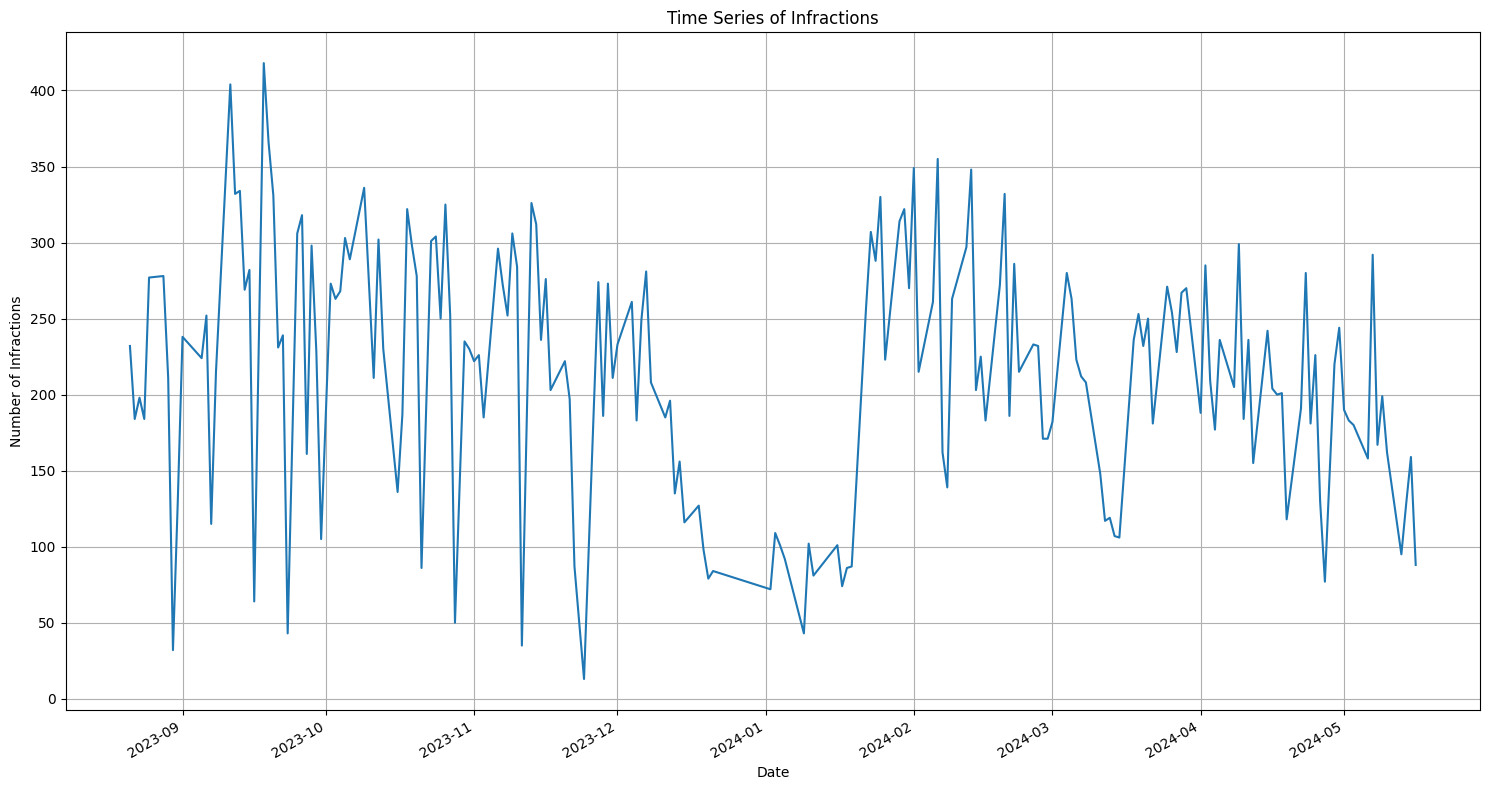

In [19]:
time_series = data['Issue Date'].value_counts().sort_index()

# Plot time series
plt.figure(figsize=(15, 8))
time_series.plot()
plt.title('Time Series of Infractions')
plt.xlabel('Date')
plt.ylabel('Number of Infractions')
plt.grid()
plt.tight_layout()
plt.show()

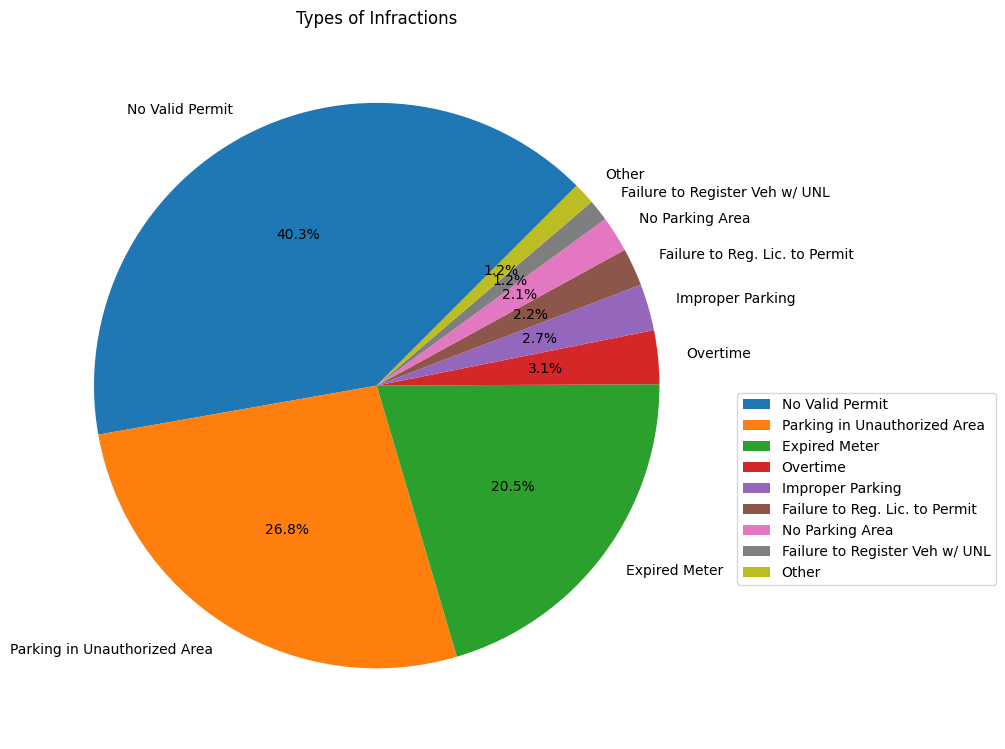

In [20]:
# Assuming `data` is your DataFrame
infraction_types = data['Description'].value_counts()

# Calculate the total number of infractions
total_infractions = infraction_types.sum()

# Determine which infractions are less than 2%
threshold = total_infractions * 0.012
infraction_types_grouped = infraction_types.copy()
infraction_types_grouped['Other'] = infraction_types[infraction_types < threshold].sum()

# Remove the individual infractions that are now grouped as "Other"
infraction_types_grouped = infraction_types_grouped[infraction_types_grouped >= threshold]

# Plot the pie chart
plt.figure(figsize=(10, 10))
plt.pie(
    infraction_types_grouped,
    labels=infraction_types_grouped.index,
    autopct='%1.1f%%',
    startangle=45
)
plt.title('Types of Infractions')

# Move legend to the side
plt.legend(infraction_types_grouped.index, loc="upper left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


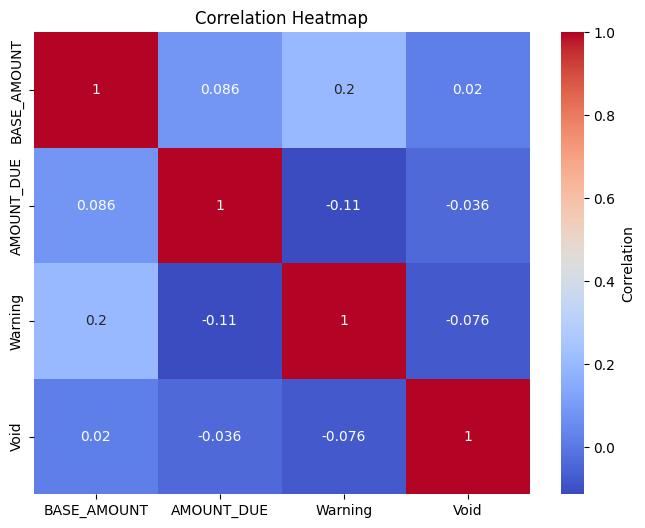

In [21]:
numeric_data = data[['BASE_AMOUNT', 'AMOUNT_DUE', 'Warning', 'Void']]

# Compute correlation matrix
correlation_matrix = numeric_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar_kws={'label': 'Correlation'})
plt.title('Correlation Heatmap')
plt.show()

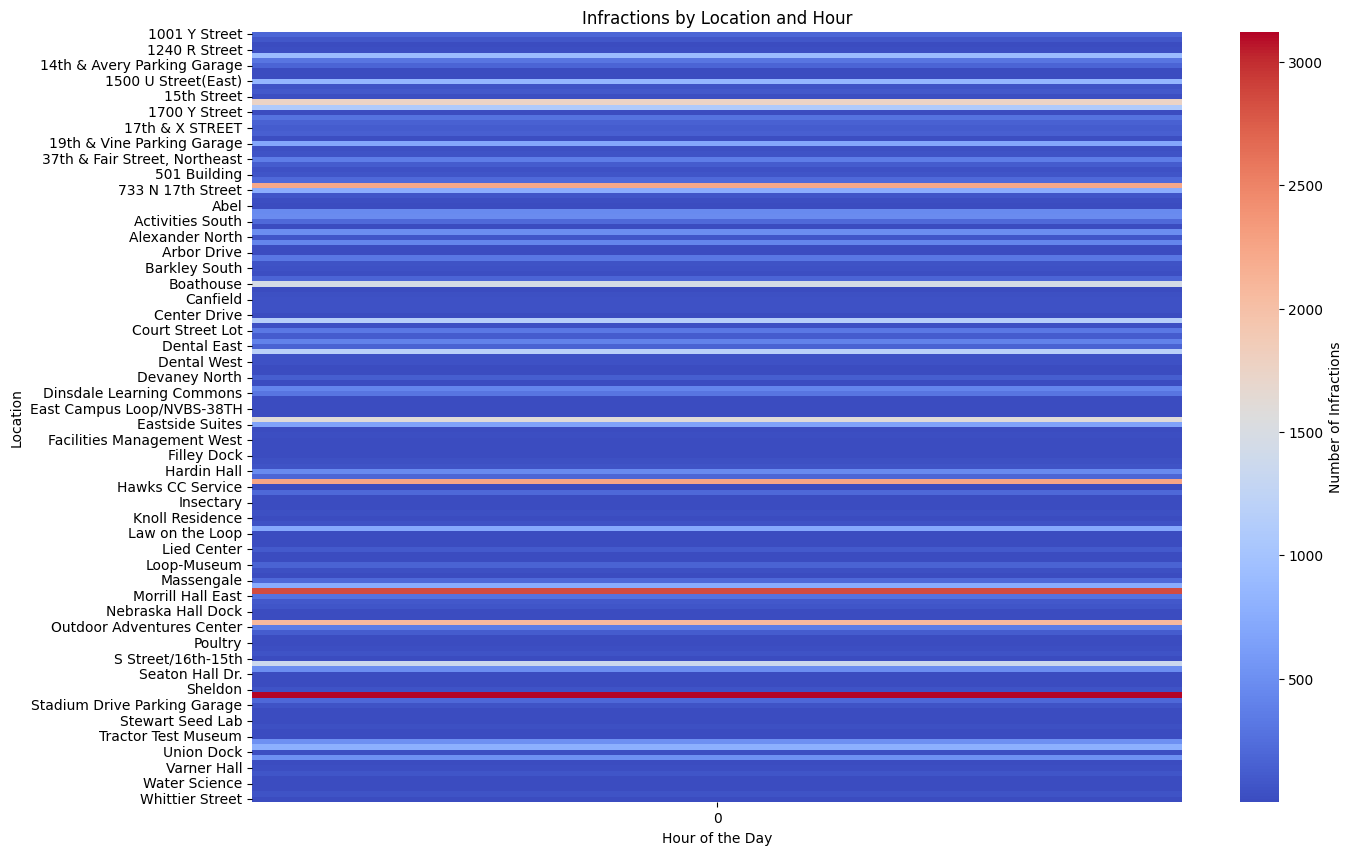

In [22]:
data['Hour'] = data['Issue Date'].dt.hour

# Group by Location and Hour
hourly_heatmap_data = data.groupby(['LOCATION', 'Hour']).size().unstack(fill_value=0)

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(hourly_heatmap_data, cmap='coolwarm', cbar_kws={'label': 'Number of Infractions'})
plt.title('Infractions by Location and Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Location')
plt.show()

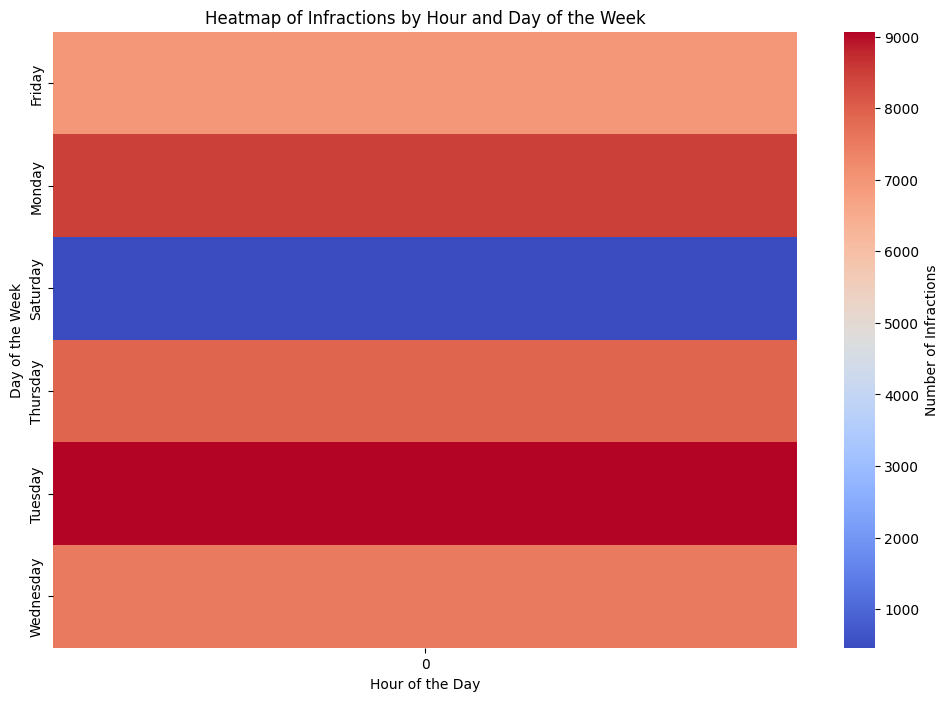

In [23]:
import seaborn as sns

# Extract day of the week and hour
data['Day'] = data['Issue Date'].dt.day_name()
heatmap_data = data.groupby(['Day', 'Hour']).size().unstack(fill_value=0)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False, cbar_kws={'label': 'Number of Infractions'})
plt.title('Heatmap of Infractions by Hour and Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()

Unique Days: ['Tuesday' 'Wednesday' 'Thursday' 'Monday' 'Friday' 'Saturday']
Unique Hours: [15 17  6 14 16 13 12  8  9 11  7 10 18 19  5  4 21 20]


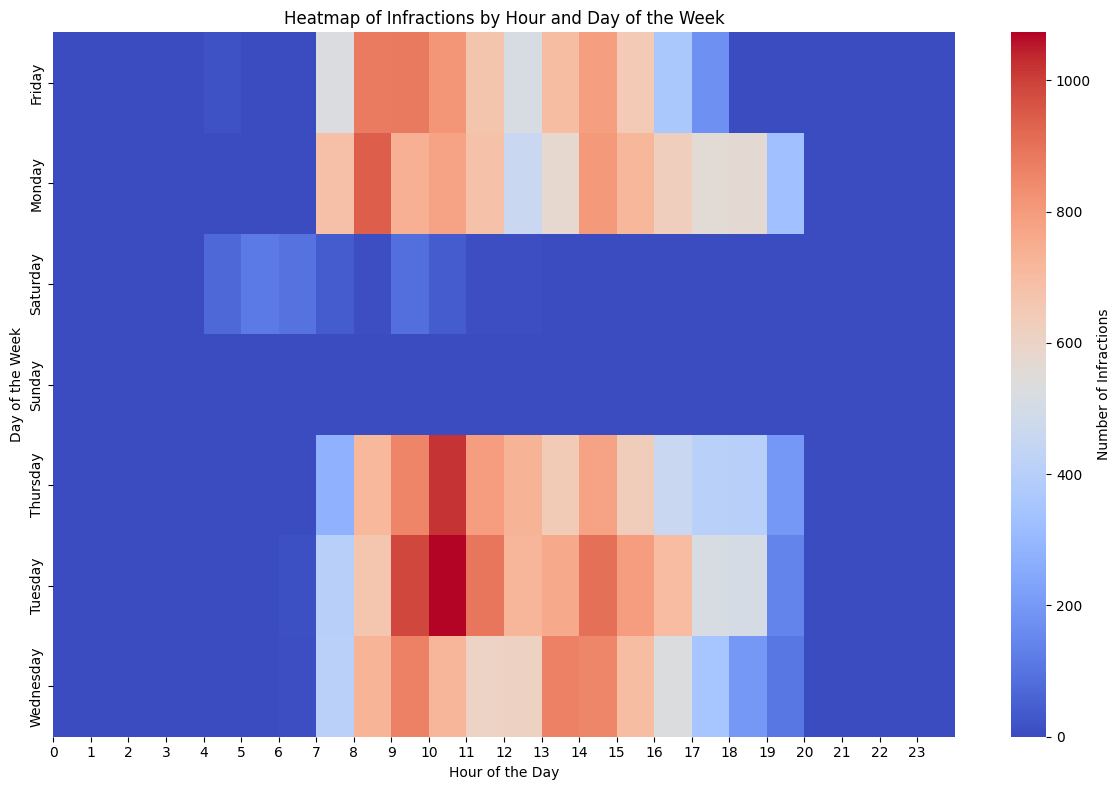

In [33]:
data['DAY_OF_WEEK'] = data['DAY_OF_WEEK'].astype(str)
data['HOUR'] = pd.to_numeric(data['HOUR'], errors='coerce')

# Debug Step: Check for missing or incorrect data in DAY_OF_WEEK or HOUR
print("Unique Days:", data['DAY_OF_WEEK'].unique())
print("Unique Hours:", data['HOUR'].unique())

# Define all hours (0-23) and all days of the week
all_hours = list(range(24))
all_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a complete grid for all days and hours
complete_grid = pd.MultiIndex.from_product([all_days, all_hours], names=['Day', 'Hour'])

# Group data and reindex to include all hours and days
heatmap_data = data.groupby(['DAY_OF_WEEK', 'HOUR']).size().reindex(complete_grid, fill_value=0).unstack()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False, cbar_kws={'label': 'Number of Infractions'})
plt.title('Heatmap of Infractions by Hour and Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.xticks(ticks=range(24), labels=range(24))  # Ensure x-axis shows 0 to 23
plt.tight_layout()
plt.show()

/var/folders/_w/q5fc1l3s77q_qnzfg6ct_p000000gn/T/ipykernel_75193/4102311365.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_citations.index, y=hourly_citations.values, palette="viridis")


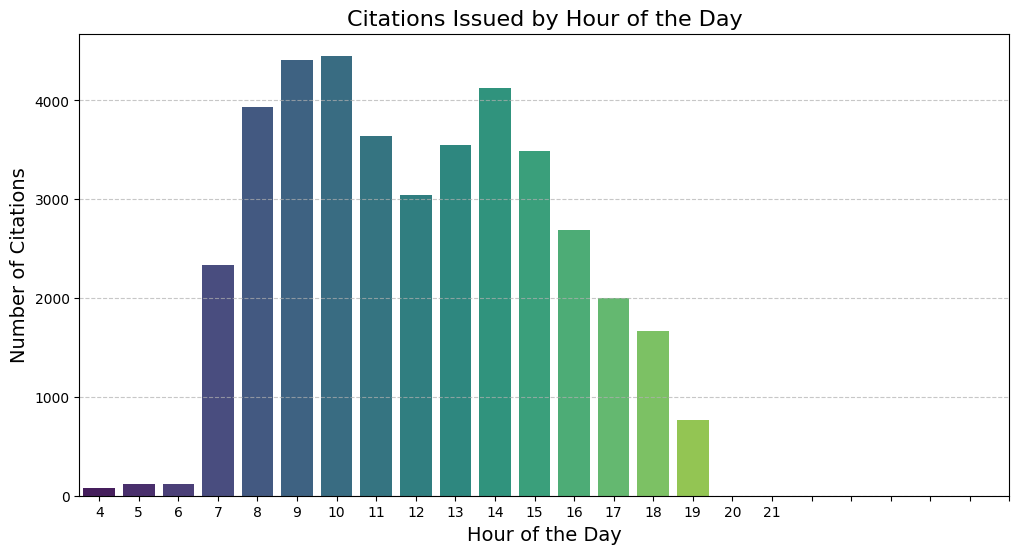

In [36]:
data['HOUR'] = pd.to_numeric(data['HOUR'], errors='coerce')

# Aggregate data to count citations by hour
hourly_citations = data.groupby('HOUR').size()

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_citations.index, y=hourly_citations.values, palette="viridis")
plt.title("Citations Issued by Hour of the Day", fontsize=16)
plt.xlabel("Hour of the Day", fontsize=14)
plt.ylabel("Number of Citations", fontsize=14)
plt.xticks(range(0, 24))  # Ensure all hours are displayed
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

/var/folders/_w/q5fc1l3s77q_qnzfg6ct_p000000gn/T/ipykernel_75193/1126808096.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


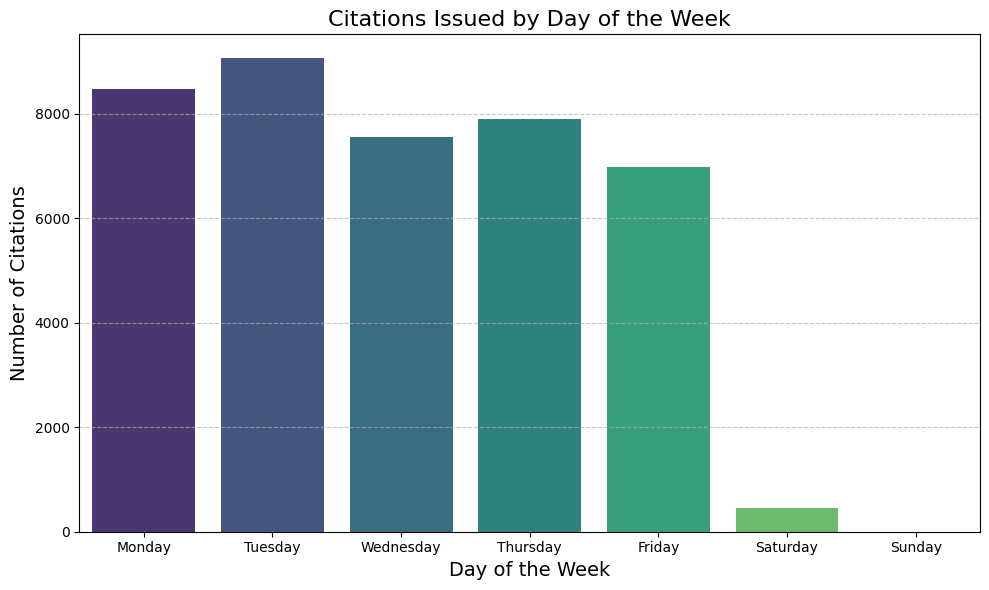

In [48]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_citations = data['DAY_OF_WEEK'].value_counts().reindex(weekday_order)

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x=daily_citations.index,
    y=daily_citations.values,
    palette=sns.color_palette("viridis", n_colors=7)
)
plt.title("Citations Issued by Day of the Week", fontsize=16)
plt.xlabel("Day of the Week", fontsize=14)
plt.ylabel("Number of Citations", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()